<a href="https://colab.research.google.com/github/sofia-sunny/Short_Introductory_Tutorials/blob/main/substructure_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Substructure Search**
In this notebook, we demonstrate how to perform a **substructure search** using RDKit, a powerful cheminformatics toolkit. Substructure searching is a fundamental technique in cheminformatics that allows us to identify **specific chemical motifs**—like a phenol group—within larger molecules.

Substructure searching is widely used in **drug discovery** (to find molecules with similar functional groups) and **database filtering** ( to identify or exclude compounds with certain features), and **SAR studies** (to relate structural motifs to biological activity).

We will:

* Work with a small set of aromatic compounds represented by their SMILES.

* Use a **SMARTS pattern **to define a phenol group (a hydroxyl group attached to an aromatic ring).

* Search for this substructure in each compound.

* Filter and visualize the matching molecules, highlighting the detected substructure.

In [ ]:
# Install RDKit,the widely used open-source cheminformatics toolkit
!pip install rdkit

### **Step 1: Import necessary libraries**
We begin by importing RDKit for molecule handling and drawing, along with pandas for tabular data, and matplotlib for potential plotting.

In [ ]:
from rdkit import Chem  # For molecule creation and chemistry functions
from rdkit.Chem import Draw  # For basic molecule drawing utilities
from rdkit.Chem.Draw import MolsToGridImage  # For displaying multiple molecules in a grid
import pandas as pd  # For working with DataFrames and tabular data

### **Step 2: Create a small sample dataset of compounds**
We'll work with a list of SMILES strings and names representing common aromatic compounds. This allows us to test the substructure search.
We then put the data in a pandas DataFrame (df)

In [ ]:
# The list of 20 aromatic compounds
data = {
    'Name': [
        'Phenol', 'Aniline', 'Toluene', 'Benzene', 'Paracetamol',
        'SalicylicAcid', 'Aspirin', 'Ibuprofen', 'Naproxen', 'Caffeine',
        'Vanillin', 'Codeine', 'Quinine', 'Chloramphenicol', 'Diazepam',
        'Imatinib', 'Tamoxifen', 'Serotonin', 'Dopamine', 'Resorcinol'
    ],
    'SMILES': [
        'c1ccccc1O',                      # Phenol
        'c1ccccc1N',                      # Aniline
        'Cc1ccccc1',                      # Toluene
        'c1ccccc1',                       # Benzene
        'CC(=O)Nc1ccc(O)cc1',             # Paracetamol
        'OC(=O)c1ccccc1O',                # Salicylic Acid
        'CC(=O)Oc1ccccc1C(=O)O',          # Aspirin
        'CC(C)Cc1ccc(cc1)[C@@H](C)C(=O)O',# Ibuprofen
        'COc1ccc2cc(C(C)C(=O)O)ccc2c1',   # Naproxen
        'Cn1cnc2c1c(=O)n(c(=O)n2C)C',     # Caffeine
        'COC1=CC=C(C=C1O)C=O',             # Vanillin
        'COc1ccc2c(c1)C[C@H]1CN(C)CCC1=C2',  # Codeine
        'COc1ccc2nc3ccccc3cc2c1OCCCN4CCCC4', # Quinine
        'ClC1=CC=C(C=C1)[C@H](NO)C(=O)NCC2=CC=CC=C2',  # Chloramphenicol
        'CN1C=NC2=C1C=CC(=C2)Cl',         # Diazepam
        'CC1=CC=CC=C1CNC2=NC3=CC=CC=C3C(=N2)N',  # Imatinib
        'CC/C(=C(/c1ccc(OCCN(C)C)cc1)C)c2ccc(C)cc2',  # Tamoxifen
        'NCCc1ccc(O)c(O)c1',              # Dopamine
        'NC1=CC=C(C=C1)OCC2=CN=CN2',      # Serotonin
        'C1=CC(=CC(=C1)O)O'               # Resorcinol
    ]
}
df = pd.DataFrame(data)
df.head()

,Name,SMILES
0,Phenol,c1ccccc1O
1,Aniline,c1ccccc1N
2,Toluene,Cc1ccccc1
3,Benzene,c1ccccc1
4,Paracetamol,CC(=O)Nc1ccc(O)cc1


### **Step 3: Convert SMILES to RDKit molecule objects**
RDKit can perform chemistry functions on **molecule objects**, so we convert each SMILES in df to a **Mol**.

In [ ]:
# Converts each SMILES string into an RDKit Mol object,
# and stores the result in a new column called 'Mol' in the DataFrame.
df['Mol'] = df['SMILES'].apply(Chem.MolFromSmiles)
df.head()

,Name,SMILES,Mol
0,Phenol,c1ccccc1O,<rdkit.Chem.rdchem.Mol object at 0x78c2d38eec00>
1,Aniline,c1ccccc1N,<rdkit.Chem.rdchem.Mol object at 0x78c2d38eec70>
2,Toluene,Cc1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x78c2d38ef680>
3,Benzene,c1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x78c2d38eea40>
4,Paracetamol,CC(=O)Nc1ccc(O)cc1,<rdkit.Chem.rdchem.Mol object at 0x78c2d38eeb20>


In [ ]:
df.head()

,Name,SMILES,Mol
0,Phenol,c1ccccc1O,<rdkit.Chem.rdchem.Mol object at 0x78c2d38eec00>
1,Aniline,c1ccccc1N,<rdkit.Chem.rdchem.Mol object at 0x78c2d38eec70>
2,Toluene,Cc1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x78c2d38ef680>
3,Benzene,c1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x78c2d38eea40>
4,Paracetamol,CC(=O)Nc1ccc(O)cc1,<rdkit.Chem.rdchem.Mol object at 0x78c2d38eeb20>


### **Step 4: Define the substructure pattern using SMARTS**
We use the **SMARTS language** to define a **phenol group**: an -OH attached directly to a benzene ring. The pattern [OH]c1ccccc1 captures this.

In [ ]:
phenol_pattern = Chem.MolFromSmarts('[OH]c1ccccc1')

### **Step 5: Search for the substructure in each molecule**
We define a function called has_phenol which get the mol object of each molecule and uses **HasSubstructMatch()** to check if the phenol pattern is present in the molecule.
The results (True or False) then will be added to df as a new column **(HasPhenol)**

In [ ]:
def has_phenol(mol):
    if mol is None:
        return False
    return mol.HasSubstructMatch(phenol_pattern)

df['HasPhenol'] = df['Mol'].apply(has_phenol)
df.head()

,Name,SMILES,Mol,HasPhenol
0,Phenol,c1ccccc1O,<rdkit.Chem.rdchem.Mol object at 0x78c2d38eec00>,True
1,Aniline,c1ccccc1N,<rdkit.Chem.rdchem.Mol object at 0x78c2d38eec70>,False
2,Toluene,Cc1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x78c2d38ef680>,False
3,Benzene,c1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x78c2d38eea40>,False
4,Paracetamol,CC(=O)Nc1ccc(O)cc1,<rdkit.Chem.rdchem.Mol object at 0x78c2d38eeb20>,True


### **Step 6: Filter the matching compounds**
Now we filter the DataFrame to only keep compounds where the phenol group was detected.
We see that only 6 molecules have a phenol pattern in them

In [ ]:
phenol_df = df.query('HasPhenol').copy()
phenol_df

,Name,SMILES,Mol,HasPhenol
0,Phenol,c1ccccc1O,<rdkit.Chem.rdchem.Mol object at 0x78c2d38eec00>,True
4,Paracetamol,CC(=O)Nc1ccc(O)cc1,<rdkit.Chem.rdchem.Mol object at 0x78c2d38eeb20>,True
5,SalicylicAcid,OC(=O)c1ccccc1O,<rdkit.Chem.rdchem.Mol object at 0x78c2d38eeb90>,True
10,Vanillin,COC1=CC=C(C=C1O)C=O,<rdkit.Chem.rdchem.Mol object at 0x78c2d38e87b0>,True
17,Serotonin,NCCc1ccc(O)c(O)c1,<rdkit.Chem.rdchem.Mol object at 0x78c2d38ea030>,True
19,Resorcinol,C1=CC(=CC(=C1)O)O,<rdkit.Chem.rdchem.Mol object at 0x78c2d38e97e0>,True


### **Step 7: Get atoms involved in the matched substructure**
To **highlight substructures**, we retrieve the **atom indices** matched by the SMARTS pattern for each molecule.

This code finds **which atoms in each molecule match the phenol substructure**, and storing those atom indices in a new column called **'HighlightAtoms'**.

In [ ]:
def highlight_phenol(mol):
    return mol.GetSubstructMatch(phenol_pattern)

phenol_df['HighlightAtoms'] = phenol_df['Mol'].apply(highlight_phenol)
phenol_df

,Name,SMILES,Mol,HasPhenol,HighlightAtoms
0,Phenol,c1ccccc1O,<rdkit.Chem.rdchem.Mol object at 0x78c2d38eec00>,True,"(6, 5, 4, 3, 2, 1, 0)"
4,Paracetamol,CC(=O)Nc1ccc(O)cc1,<rdkit.Chem.rdchem.Mol object at 0x78c2d38eeb20>,True,"(8, 7, 6, 5, 4, 10, 9)"
5,SalicylicAcid,OC(=O)c1ccccc1O,<rdkit.Chem.rdchem.Mol object at 0x78c2d38eeb90>,True,"(9, 8, 7, 6, 5, 4, 3)"
10,Vanillin,COC1=CC=C(C=C1O)C=O,<rdkit.Chem.rdchem.Mol object at 0x78c2d38e87b0>,True,"(8, 7, 6, 5, 4, 3, 2)"
17,Serotonin,NCCc1ccc(O)c(O)c1,<rdkit.Chem.rdchem.Mol object at 0x78c2d38ea030>,True,"(7, 6, 5, 4, 3, 10, 8)"
19,Resorcinol,C1=CC(=CC(=C1)O)O,<rdkit.Chem.rdchem.Mol object at 0x78c2d38e97e0>,True,"(6, 4, 3, 2, 1, 0, 5)"


### **Step 8: Display matched molecules with highlights**
Now we generate a grid image of matched molecules, showing their names and **highlighting the phenol atoms.**

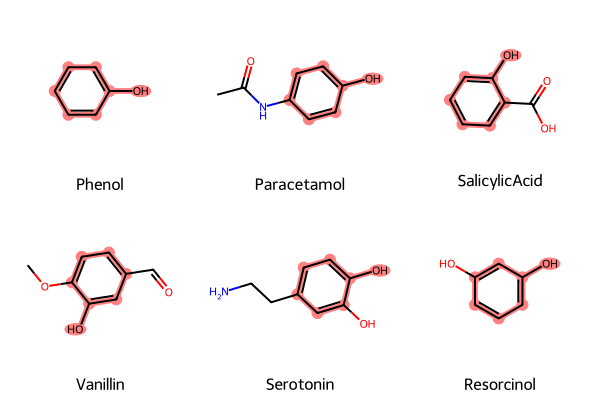

In [ ]:
mols = phenol_df['Mol'].tolist()  # List of RDKit Mol objects to display
highlights = phenol_df['HighlightAtoms'].tolist()  # List of atom indices to highlight in each molecule

MolsToGridImage(
    mols,  # List of RDKit Mol objects to display
    molsPerRow=3,  # Number of molecules per row in the grid
    subImgSize=(200, 200),  # Size of each molecule image (width, height in pixels)
    highlightAtomLists=highlights,  # List of atom indices to highlight in each molecule
    legends=phenol_df['Name'].tolist()  # Labels shown under each molecule (names from the DataFrame)
)



So as you can see this visualization makes it easy to quickly identify which compounds meet the search criteria and where the functional group is located within the molecular structure.
Finally, we display a simplified table of the compounds that matched the phenol pattern.

In [ ]:
# Show DataFrame
phenol_df[['Name', 'SMILES', 'HasPhenol']]

,Name,SMILES,HasPhenol
0,Phenol,c1ccccc1O,True
4,Paracetamol,CC(=O)Nc1ccc(O)cc1,True
5,SalicylicAcid,OC(=O)c1ccccc1O,True
10,Vanillin,COC1=CC=C(C=C1O)C=O,True
17,Serotonin,NCCc1ccc(O)c(O)c1,True
19,Resorcinol,C1=CC(=CC(=C1)O)O,True


We can export the filtered phenol-containing compounds to a CSV file

In [ ]:
phenol_df[['Name', 'SMILES', 'HasPhenol']].to_csv('phenol_matches.csv', index=False)